## Grip : The Sparks Foundation
#### Data Science and Business Analytics Intern
#### Author : Vishwadeep Kamble
#### Task 1: Prediction Using Supervised Machine Learning

##### In this task we have to predict the percentage score of the students based on the number of hours studied.

In [1]:
# importing libraries

import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline

#### Reading datastet

In [2]:
data = pd.read_csv("https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv")
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


#### Exploring data

In [32]:
print(data.shape)
data.head()

(25, 2)


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [33]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


#### Plotting the scatter plot

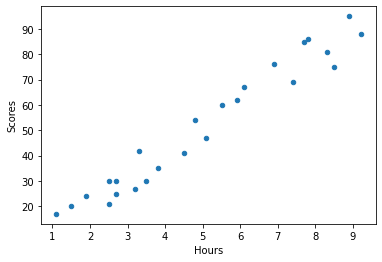

In [34]:
data.plot(kind = "scatter", x = "Hours", y = "Scores")
plt.show()

#### checking correlation between "Hours" and "Scores"

In [8]:
data.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


#### Representing correlation in form of Heatmap

<IPython.core.display.Javascript object>

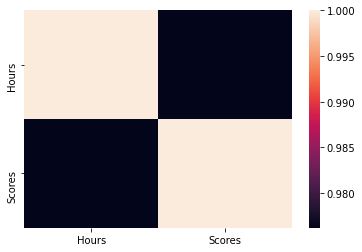

In [35]:
sns.heatmap(data.corr())

#### Distplot

In [3]:
hours = data["Hours"]
scores = data["Scores"]

<IPython.core.display.Javascript object>

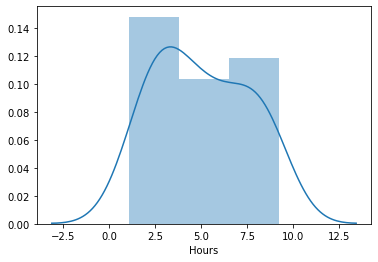

In [16]:
sns.distplot(hours)

<IPython.core.display.Javascript object>

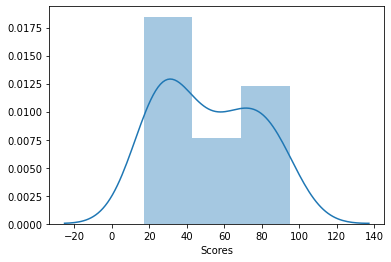

In [17]:
sns.distplot(scores)

#### Splitting dependent variable and independent variable

In [4]:
X = data.iloc[:, :-1].values
y = data.iloc[:,1].values

In [5]:
from sklearn.model_selection import train_test_split

#### Splitting data into Train and Test

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [7]:
from sklearn.linear_model import LinearRegression

#### Fitting model on Training set

In [8]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

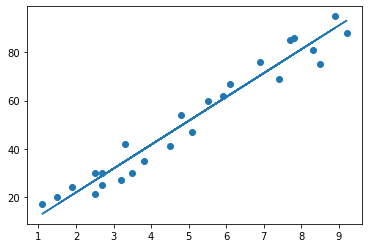

In [9]:
m = regressor.coef_
c = regressor.intercept_
line = m*X+c

plt.scatter(X, y)
plt.plot(X, line);
plt.show()

#### Prediction on Test data

In [10]:
y_pred = regressor.predict(X_test)
y_pred

array([16.88414476, 33.73226078, 75.357018  , 26.79480124, 60.49103328])

In [11]:
# Comparing Actual vs Predicted data

actual_predicted = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
actual_predicted 

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


#### What will be predicted score if a student studies for 9.25 hrs/ day?

In [12]:
h = 9.25
s = regressor.predict([[h]])
print(f"If a student studies for 9.25 hrs/ day, he/she will score {s}% in exams")

If a student studies for 9.25 hrs/ day, he/she will score [93.69173249]% in exams


#### Model Evaluation

In [13]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [15]:
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred)) 
print("r2_score:", r2_score(y_test, y_pred))
print("mean_squared_error:", np.sqrt(mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 4.183859899002982
r2_score: 0.9454906892105354
mean_squared_error: 4.647447612100373
